In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/mane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

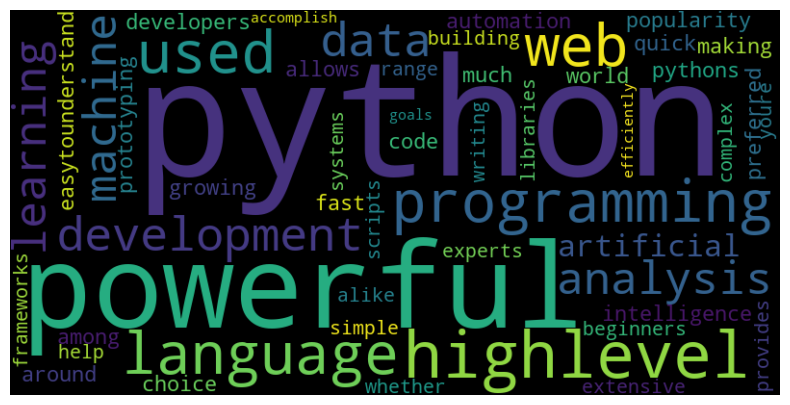

In [28]:
from collections import Counter
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords

# 긴 텍스트 예시
text = """
Python is a powerful high-level programming language. Python can be used for web development, 
data analysis, machine learning, artificial intelligence, automation, and much more. Python's 
popularity is growing fast among developers around the world. Python allows for quick 
prototyping and easy-to-understand code, making it a preferred choice for beginners and experts alike. 
Whether you're building complex systems or writing simple scripts, Python provides an extensive 
range of libraries and frameworks to help you accomplish your goals efficiently.
"""

# 정규 표현식을 사용하여 텍스트 전처리 (특수 문자 제거, 소문자로 변환)
cleaned_text = re.sub(r'[^A-Za-z\s]', '', text.lower())

# 불용어 제거
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in cleaned_text.split() if word not in stop_words]

# 단어 빈도수 계산
word_counts = Counter(filtered_words)

# 로그 정규화
normalized_counts_log = {word: np.log(1 + count) for word, count in word_counts.items()}

# 워드클라우드 생성
wc = WordCloud(width=800, height=400).generate_from_frequencies(normalized_counts_log)

# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Counter({'Python': 4, 'and': 4, 'for': 3, 'is': 2, 'a': 2, 'powerful': 1, 'highlevel': 1, 'programming': 1, 'language': 1, 'can': 1, 'be': 1, 'used': 1, 'web': 1, 'development': 1, 'data': 1, 'analysis': 1, 'machine': 1, 'learning': 1, 'artificial': 1, 'intelligence': 1, 'automation': 1, 'much': 1, 'more': 1, 'Pythons': 1, 'popularity': 1, 'growing': 1, 'fast': 1, 'among': 1, 'developers': 1, 'around': 1, 'the': 1, 'world': 1, 'allows': 1, 'quick': 1, 'prototyping': 1, 'easytounderstand': 1, 'code': 1, 'making': 1, 'it': 1, 'preferred': 1, 'choice': 1, 'beginners': 1, 'experts': 1, 'alike': 1, 'Whether': 1, 'youre': 1, 'building': 1, 'complex': 1, 'systems': 1, 'or': 1, 'writing': 1, 'simple': 1, 'scripts': 1, 'provides': 1, 'an': 1, 'extensive': 1, 'range': 1, 'of': 1, 'libraries': 1, 'frameworks': 1, 'to': 1, 'help': 1, 'you': 1, 'accomplish': 1, 'your': 1, 'goals': 1, 'efficiently': 1})
{'Python': 1.0, 'is': 0.3333333333333333, 'a': 0.3333333333333333, 'powerful': 0.1, 'highlevel': 

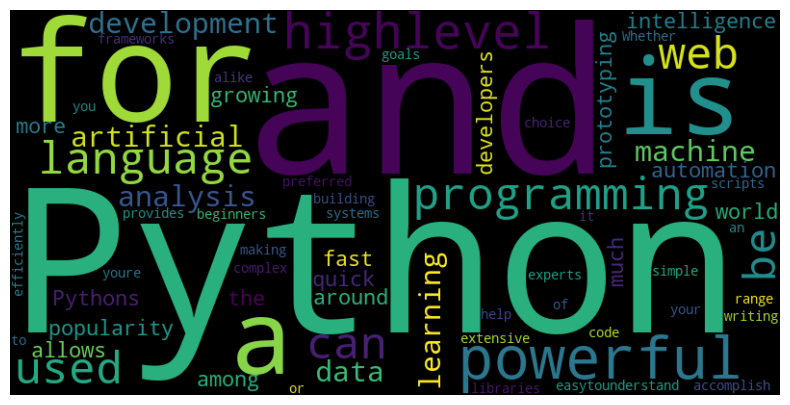

In [29]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# 텍스트 예시
text = """
Python is a powerful high-level programming language. Python can be used for web development, 
data analysis, machine learning, artificial intelligence, automation, and much more. Python's 
popularity is growing fast among developers around the world. Python allows for quick 
prototyping and easy-to-understand code, making it a preferred choice for beginners and experts alike. 
Whether you're building complex systems or writing simple scripts, Python provides an extensive 
range of libraries and frameworks to help you accomplish your goals efficiently.
"""

# 특수 문자 및 구두점 제거
cleaned_text = re.sub(r'[^\w\s]', '', text)

# 단어 빈도수 계산
word_counts = Counter(cleaned_text.split())
print(word_counts)  # 빈도 확인

# Min-Max 정규화 (최소값 보정)
min_count = min(word_counts.values())
max_count = max(word_counts.values())
normalized_counts = {word: max(0.1, (count - min_count) / (max_count - min_count)) for word, count in word_counts.items()}

print(normalized_counts)  # 정규화 확인

# 워드클라우드 생성
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(normalized_counts)

# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


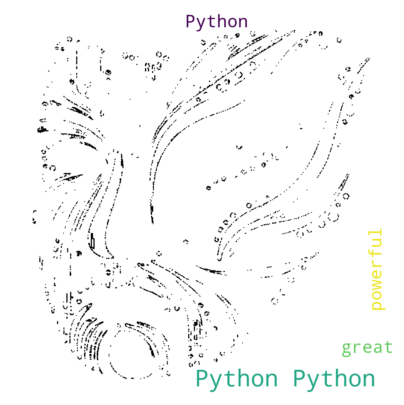

In [34]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 이미지 파일을 불러와서 마스크로 사용
mask_image = Image.open('aa.webp').convert("L")

# NumPy 배열로 변환
mask_array = np.array(mask_image)

# 워드클라우드 생성
wc = WordCloud(width=800, height=800, background_color="white", mask=mask_array, contour_width=3, contour_color='black')

# 텍스트 예시
text = "Python is great. Python is powerful. Python Python Python."

# 워드클라우드 생성
wc.generate(text)

# 워드클라우드 표시
plt.figure(figsize=(5, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()